# Problem Statement:
  You work for an e-commerce company. Based on users' demographics like Age and Estimated Salary, you want to predict whether they will buy a new product. This can help target ads more effectively.

# Step 1: import libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: load dataset

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data = data.drop(['User ID'], axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Step 3: preprocessing

In [4]:
# Feature and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Step 4: Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# feature scaling ( Imp for KNN because it is distance based algorithm )
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 5: Train model

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Step 6: Evaluate Model

Accuracy: 93.75%


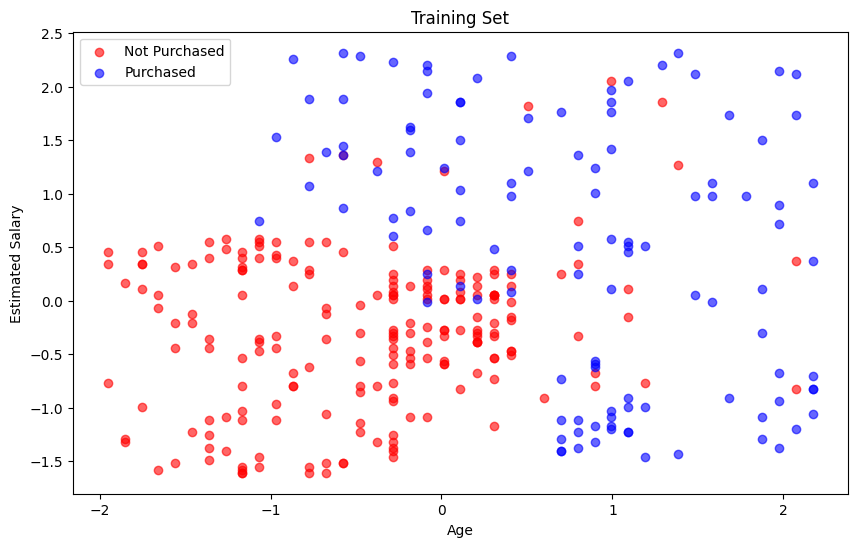

In [57]:
y_pred = knn.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(knn.score(X_test, y_test) * 100))

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Purchased', alpha=0.6)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Purchased', alpha=0.6)
plt.title('Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()  


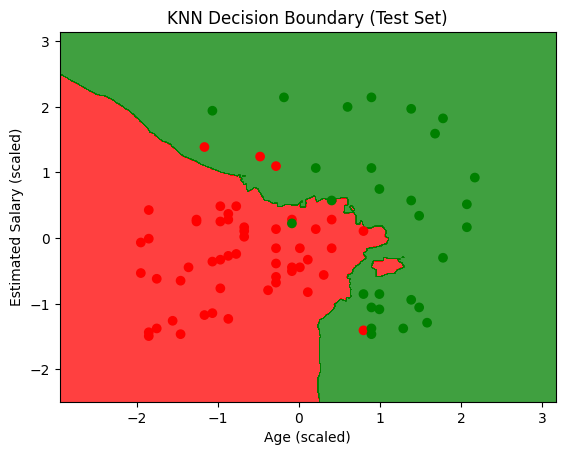

In [58]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
plt.title('KNN Decision Boundary (Test Set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()

In [64]:
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # print(f'K={i}')
    accuracy = knn.score(X_test, y_test)
    print(f'Accuracy for K={i}: {accuracy*100:.2f}%')
    if i == 1 or accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = i

print(f'Best K: {best_k} with accuracy: {best_accuracy * 100:.2f}%')


    




Accuracy for K=1: 82.50%
Accuracy for K=2: 86.25%
Accuracy for K=3: 91.25%
Accuracy for K=4: 92.50%
Accuracy for K=5: 91.25%
Accuracy for K=6: 90.00%
Accuracy for K=7: 93.75%
Accuracy for K=8: 92.50%
Accuracy for K=9: 93.75%
Accuracy for K=10: 92.50%
Accuracy for K=11: 92.50%
Accuracy for K=12: 92.50%
Accuracy for K=13: 92.50%
Accuracy for K=14: 92.50%
Best K: 7 with accuracy: 93.75%
